# Supervised Learning Algorithms


1. K-Nearest Neighbors (KNN)
2. Naive Bayes Classifier
3. Decision Trees
4. Support Vector Machine (SVR, SVC)
5. Random Forest (Ensemble Learning)


* Classification: `titanic_cleaned.csv`
* Regression: `insurance_cleaned.csv`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

sns.set(style="whitegrid", palette="muted")

print("All libraries imported successfully.")

All libraries imported successfully.


## Part 1: Classification (Titanic Dataset)

In [8]:
df_titanic = pd.read_csv("./data/titanic_cleaned.csv")


X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']


# Train-Test Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Scaling (Crucial for KNN)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

### 1. K-Nearest Neighbors (KNN) - Classification

![](https://www.kdnuggets.com/wp-content/uploads/arya_knearest_neighbors_classification_1.jpg)

**How it works:**
1. Choose the number of neighbors, K.
2. For a new data point, calculate the distance (Euclidean, Manhattan, etc) to all points in the training set.
3. Select the K nearest data points.
4. Voting: For classification, assign the specific class that is most frequest among the K neighbors.

Key Hyperparameter: K
* Small K: Sensitive to noise points (High Variance, Overfitting)
* Large K: High Computational Cost, smoother decision boundaries, but might miss local patterns (High Bias, Underfitting)

![](https://miro.medium.com/1*nx_7Z__Nnx05PA-jpGEcxw.jpeg)

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {acc_knn:.4f}")
print("\nKNN Classification Report: \n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7577

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       127
           1       0.67      0.58      0.62        67

    accuracy                           0.76       194
   macro avg       0.73      0.72      0.72       194
weighted avg       0.75      0.76      0.75       194



### 2. Naive Bayes - Classification

It is a probabilistic classifier based on Bayes' Theorem with a strong (naive) independence assumption.

It assumes that all features are independent of each other given the class label.


![](https://towardsdatascience.com/wp-content/uploads/2020/03/1CnoTGGO7XeUpUMeXDrIfvA.png)

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred_nb)

print(f"Gaussian Naive Bayes Accuracy: {acc_gnb:.4f}")
print("\nGaussian Naive Bayes Classification Report: \n", classification_report(y_test, y_pred_nb))

Gaussian Naive Bayes Accuracy: 0.7526

Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       127
           1       0.62      0.72      0.67        67

    accuracy                           0.75       194
   macro avg       0.73      0.74      0.73       194
weighted avg       0.76      0.75      0.76       194



### 3. Decision Tree - Classification

![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjDcRIBUceFCKeiFrm5eNjIZ_hLrcLj19fG6hNC-fbF6xYGAmjQhQDo7VKETbqXx3-NM0-zLuhVl7IZ-NW__8C8OMRfKvW2QNwkUi39N49dKYLPbbLwz3veTP_qvyB3ybwLWcq8hbr6tLwOYE_ZKKTEyg6QZWSxbHPEbL4rlwu0i3JCdb4hv_M4ZUeeA0o/s2310/decision_tree_for_heart_attack_prevention_2140bd762d.png)

Trees tend to overfit easily if allowed to grow very deep, capturing every noise sample.

In [26]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print("\Decision Tree Classification Report: \n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7990
\Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       127
           1       0.72      0.69      0.70        67

    accuracy                           0.80       194
   macro avg       0.78      0.77      0.78       194
weighted avg       0.80      0.80      0.80       194



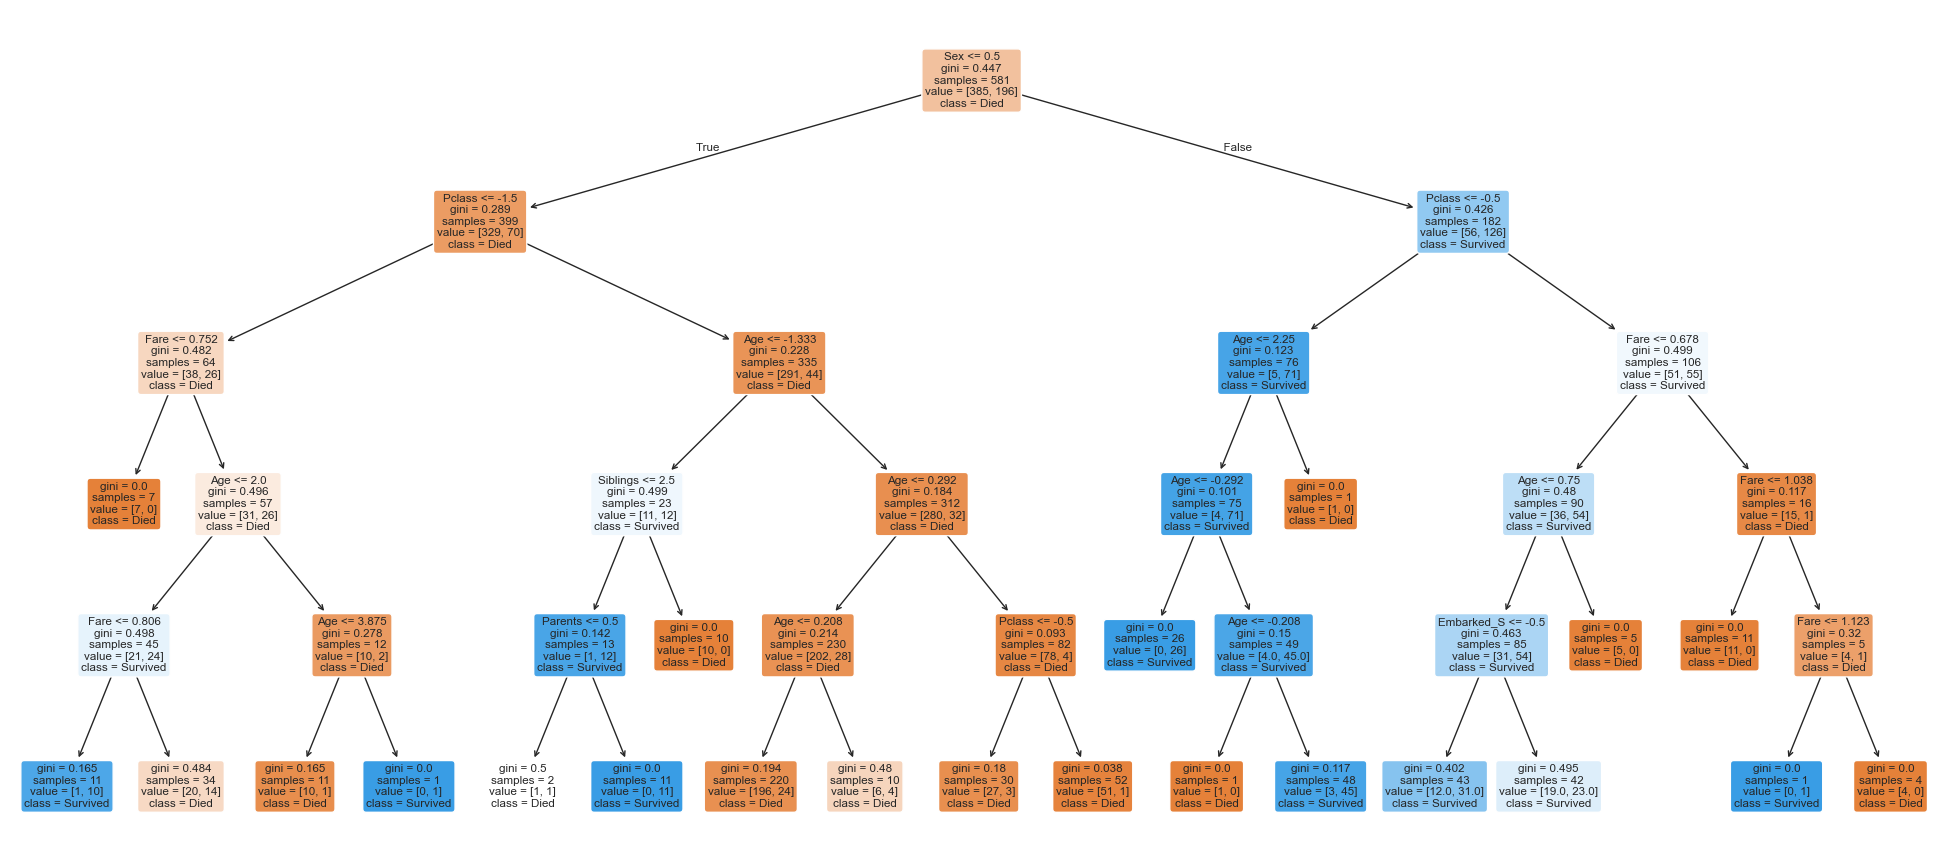

In [29]:
plt.figure(figsize=(25, 11))
plot_tree(dt, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True, rounded=True)
plt.savefig('DecisionTree.jpg')
plt.show()